In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/gun-violence-data/gun-violence-data_01-2013_03-2018.csv


In [3]:
df = pd.read_csv('/kaggle/input/gun-violence-data/gun-violence-data_01-2013_03-2018.csv')#Veri Setini okuttuk

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   incident_id                  239677 non-null  int64  
 1   date                         239677 non-null  object 
 2   state                        239677 non-null  object 
 3   city_or_county               239677 non-null  object 
 4   address                      223180 non-null  object 
 5   n_killed                     239677 non-null  int64  
 6   n_injured                    239677 non-null  int64  
 7   incident_url                 239677 non-null  object 
 8   source_url                   239209 non-null  object 
 9   incident_url_fields_missing  239677 non-null  bool   
 10  congressional_district       227733 non-null  float64
 11  gun_stolen                   140179 non-null  object 
 12  gun_type                     140226 non-null  object 
 13 

In [4]:
df.describe()

,incident_id,n_killed,n_injured,congressional_district,latitude,longitude,n_guns_involved,state_house_district,state_senate_district
count,2.396770e+05,239677.000000,239677.000000,227733.000000,231754.000000,231754.000000,140226.000000,200905.000000,207342.00000
mean,5.593343e+05,0.252290,0.494007,8.001265,37.546598,-89.338348,1.372442,55.447132,20.47711
std,2.931287e+05,0.521779,0.729952,8.480835,5.130763,14.359546,4.678202,42.048117,14.20456
min,9.211400e+04,0.000000,0.000000,0.000000,19.111400,-171.429000,1.000000,1.000000,1.00000
25%,3.085450e+05,0.000000,0.000000,2.000000,33.903400,-94.158725,1.000000,21.000000,9.00000
50%,5.435870e+05,0.000000,0.000000,5.000000,38.570600,-86.249600,1.000000,47.000000,19.00000
75%,8.172280e+05,0.000000,1.000000,10.000000,41.437375,-80.048625,1.000000,84.000000,30.00000
max,1.083472e+06,50.000000,53.000000,53.000000,71.336800,97.433100,400.000000,901.000000,94.00000


In [5]:
df.head(10)

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0
5,478948,2013-01-07,Oklahoma,Tulsa,6000 block of South Owasso,4,0,http://www.gunviolencearchive.org/incident/478948,http://usnews.nbcnews.com/_news/2013/01/07/163...,False,...,0::23||1::23||2::33||3::55,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Female||2::Female||3::Female||4:...,0::Rebeika Powell||1::Kayetie Melchor||2::Mist...,NaN,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.kjrh.com/news/local-news/4-found-sh...,72.0,11.0
6,479363,2013-01-19,New Mexico,Albuquerque,2806 Long Lane,5,0,http://www.gunviolencearchive.org/incident/479363,http://hinterlandgazette.com/2013/01/pastor-gr...,False,...,0::51||1::40||2::9||3::5||4::2||5::15,0::Adult 18+||1::Adult 18+||2::Child 0-11||3::...,0::Male||1::Female||2::Male||3::Female||4::Fem...,0::Greg Griego||1::Sara Griego||2::Zephania Gr...,5::Family,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.cbsnews.com/news/nehemiah-gringo-ca...,10.0,14.0
7,479374,2013-01-21,Louisiana,New Orleans,LaSalle Street and Martin Luther King Jr. Boul...,0,5,http://www.gunviolencearchive.org/incident/479374,http://www.nola.com/crime/index.ssf/2013/01/no...,False,...,NaN,NaN,0:

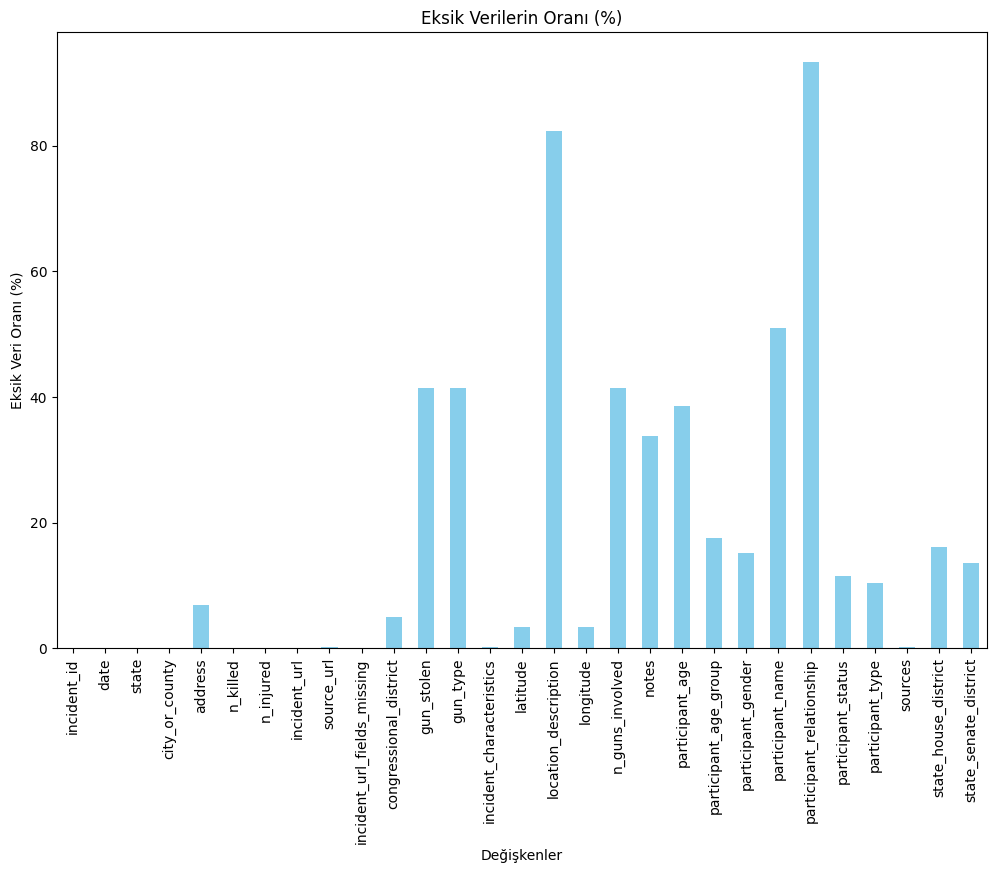

In [6]:
# Eksik değerlerin oranını hesaplama
missing_data = df.isnull().mean() * 100

# Eksik verilerin oranlarını görselleştirme
plt.figure(figsize=(12, 8))
missing_data.plot(kind='bar', color='skyblue')
plt.title('Eksik Verilerin Oranı (%)')
plt.xlabel('Değişkenler')
plt.ylabel('Eksik Veri Oranı (%)')
plt.xticks(rotation=90)
plt.show()


In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Sayısal değişkenlerin standardizasyonu
numeric_features = ['n_killed', 'n_injured']  # K-means için kullanacağımız özellikler
X_numeric = df_cleaned[numeric_features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

In [22]:
# K-Means Kümeleme
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
df_cleaned['cluster'] = kmeans.fit_predict(X_scaled)

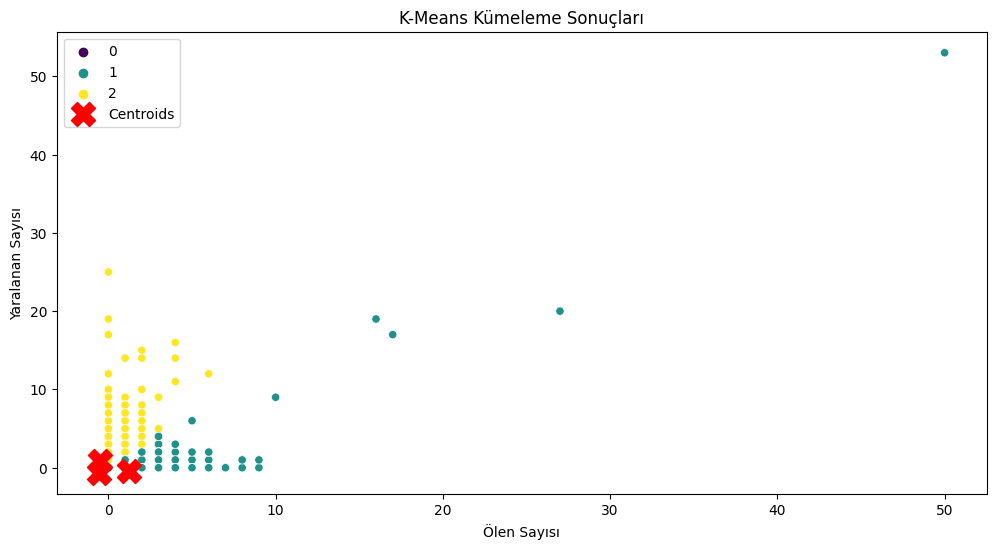

In [23]:
# Küme merkezlerini görselleştirme
centroids = kmeans.cluster_centers_

# Kümeleme sonuçlarının görselleştirilmesi
plt.figure(figsize=(12, 6))
sns.scatterplot(x='n_killed', y='n_injured', hue='cluster', data=df_cleaned, palette='viridis', marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('K-Means Kümeleme Sonuçları')
plt.xlabel('Ölen Sayısı')
plt.ylabel('Yaralanan Sayısı')
plt.legend()
plt.show()

* Centroids 0-10 arası bir alanda bulunması, kümelerin bu bölgede yoğunlaştığını gösterir. Merkezler arasındaki mesafe, kümeler arasındaki ayrımı ve kümelerin ne kadar ayrı olduğunu görselleştirir.
* küme merkezleri birbirine yakın olduğu için kümeler içinde belirgin bir ayrım olmadığını gösterir.

In [38]:
# Küme merkezlerinin ve her kümedeki örneklerin ortalama değerlerini hesaplama
centroids_df = pd.DataFrame(centroids, columns=numeric_features, index=[f'Cluster {i}' for i in range(len(centroids))])
means_df = df_cleaned.groupby('cluster')[numeric_features].mean()

# Her kümedeki örneklerin sayısını gösterme
cluster_counts = df_cleaned['cluster'].value_counts()

In [34]:
df_cleaned[['cluster']].head()
df_cleaned['cluster'] = kmeans.fit_predict(X_scaled)
df_cleaned['cluster'].unique()
# Her kümedeki örneklerin sayısını hesaplama
cluster_counts = df_cleaned['cluster'].value_counts()

# Sonuçları gösterme
import IPython.display as display
display.display(cluster_counts)


cluster
2    18728
0    15284
1    14719
Name: count, dtype: int64

* Bu sonuçlar, K-Means modelinin verileri 3 kümeye ayırdığını ve her bir kümenin belirli sayıda örnek içerdiğini gösteriyor.

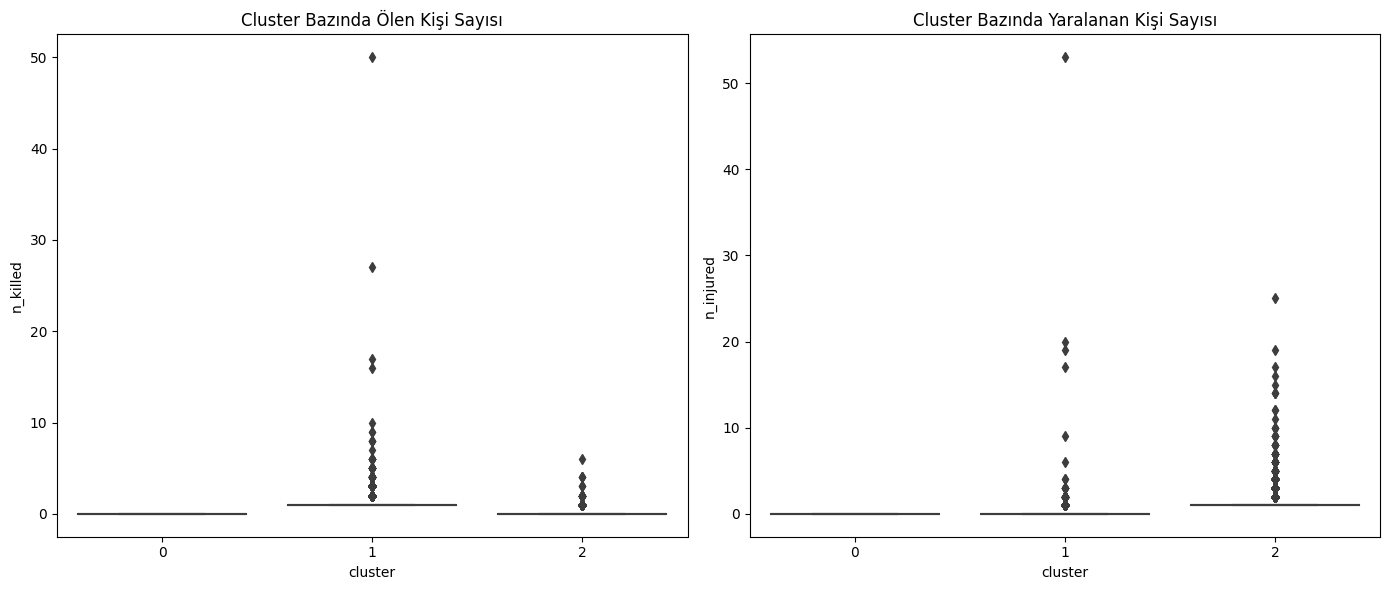

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Her kümedeki ölen ve yaralanan kişi sayılarını gösteren grafikler
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df_cleaned, x='cluster', y='n_killed')
plt.title('Cluster Bazında Ölen Kişi Sayısı')

plt.subplot(1, 2, 2)
sns.boxplot(data=df_cleaned, x='cluster', y='n_injured')
plt.title('Cluster Bazında Yaralanan Kişi Sayısı')

plt.tight_layout()
plt.show()


In [37]:
# Her küme için özetleyici istatistikler
cluster_summary = df_cleaned.groupby('cluster').agg({
    'n_killed': ['mean', 'std', 'median'],
    'n_injured': ['mean', 'std', 'median']
})

print(cluster_summary)


         n_killed                  n_injured                 
             mean       std median      mean       std median
cluster                                                      
0        0.000000  0.000000    0.0  0.000000  0.000000    0.0
1        1.160405  0.692901    1.0  0.157280  0.640976    0.0
2        0.034387  0.204851    0.0  1.253524  0.754838    1.0


* cluster 0: Bu kümedeki olaylarda ölen veya yaralanan kişi bulunmuyor. Olaylar genellikle düşük şiddetli.
* cluster 1: Bu kümedeki olaylarda ölen kişi sayısı genellikle bir ya da biraz daha fazla, ancak yaralanan kişi sayısı oldukça düşük.
* cluster 3: Bu kümedeki olaylarda ölen kişi sayısı çok düşük, ancak yaralanan kişi sayısı ortalama bir veya daha fazla.


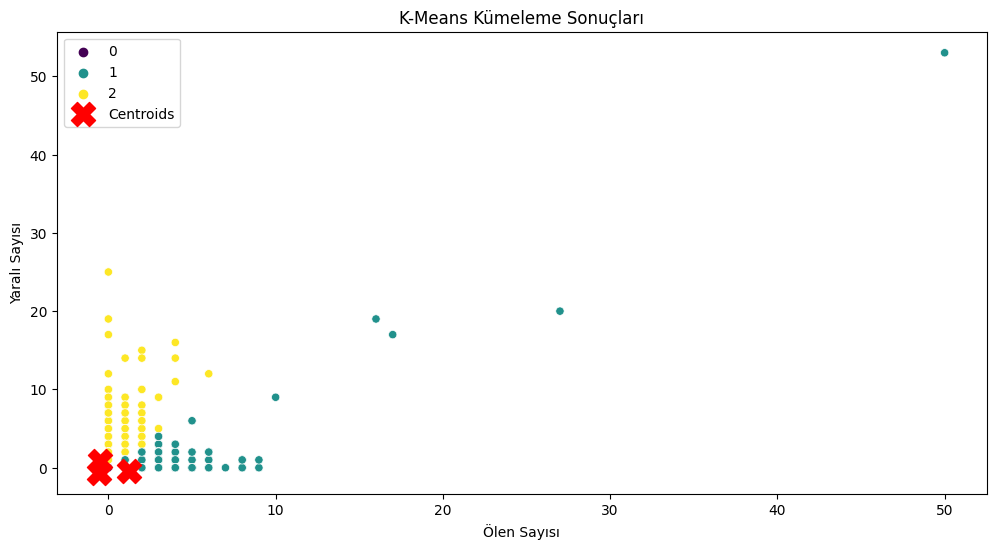

In [31]:
# Sonuçları görselleştirme
plt.figure(figsize=(12, 6))
sns.scatterplot(x='n_killed', y='n_injured', hue='cluster', data=df_cleaned, palette='viridis', marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('K-Means Kümeleme Sonuçları')
plt.xlabel('Ölen Sayısı')
plt.ylabel('Yaralı Sayısı')
plt.legend()
plt.show()

In [39]:
# Silhouette Score hesaplama
sil_score = silhouette_score(X_scaled, df_cleaned['cluster'])

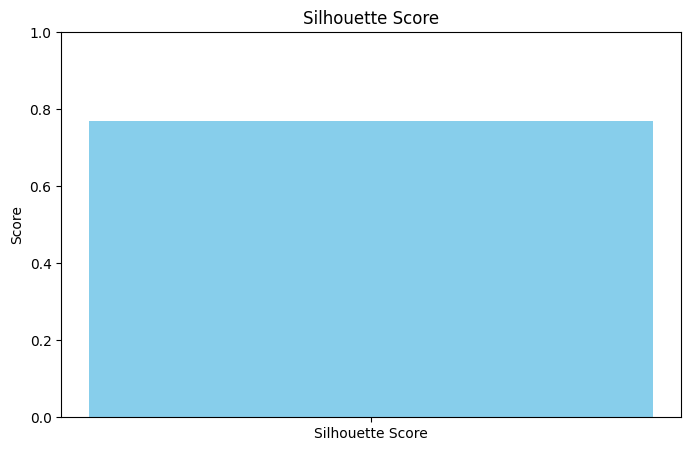

In [40]:
# Silhouette Score'un görselleştirilmesi
plt.figure(figsize=(8, 5))
plt.bar(['Silhouette Score'], [sil_score], color='skyblue')
plt.ylim(0, 1)
plt.title('Silhouette Score')
plt.ylabel('Score')
plt.show()


* Veriler, kendi kümeleri içinde oldukça homojen ve benzer.
* Veriler arasında belirgin bir ayrım var. Her bir veri noktası, kendi kümesine oldukça yakın ve diğer kümelere göre belirgin bir şekilde uzak.